# Analysis of UQ runs

In this notebook I have taken the output of the default DEMO 2016 analysis and optimised for the aspect ratio and the minimum burn time.

This made the design much more "convergent" with a rate of 0.19 and 374 
samples. This means we can do some more sophisticated fitting to the data.

## Convergent parameters
Aspect remains a very important parameter but minimum burn time is not. This could be because the burntime is now in a "safe" area of convergence space. 

One question to ask is, when the minimum burn time is in this region, why is it not influential?




## Calculate Sensitivity Indices and Reliability

In [1]:
%load_ext autoreload
%autoreload 1
from pathlib import Path
from bokeh.plotting import figure, show
import sys

sys.path.append('/home/graeme/process_uq/')
sys.path.append('/home/graeme/PROCESS_SALib/')
from uq_analysis import UncertaintyData, Copula, CopulaAnalysis
# from bokeh.plotting import figure 
from bokeh.io import output_notebook
output_notebook()

proj_dir = str(Path.cwd())+"/"
proj_dir = "/home/graeme/data/uq_run_data/paper_runs/demo_opt_analysis/output"
figure_of_merit = "rmajor"
uq_data = UncertaintyData(proj_dir, figure_of_merit,use_scoping_data=False)



Loading BokehJS ...

In [2]:
uq_data.calculate_sensitivity(figure_of_merit)
uq_data.calculate_failure_probability()
print("Number of samples: ", len(uq_data.uncertainties_df))
print("Number of converged runs: ",uq_data.number_of_converged_runs,)
print("Failure Rate: ", uq_data.failure_probability,"+/-", uq_data.failure_cov)


Number of samples:  1986
Number of converged runs:  374
Failure Rate:  0.81 +/- 0.01


## Regional Sensitivity - what causes PROCESS to converge?

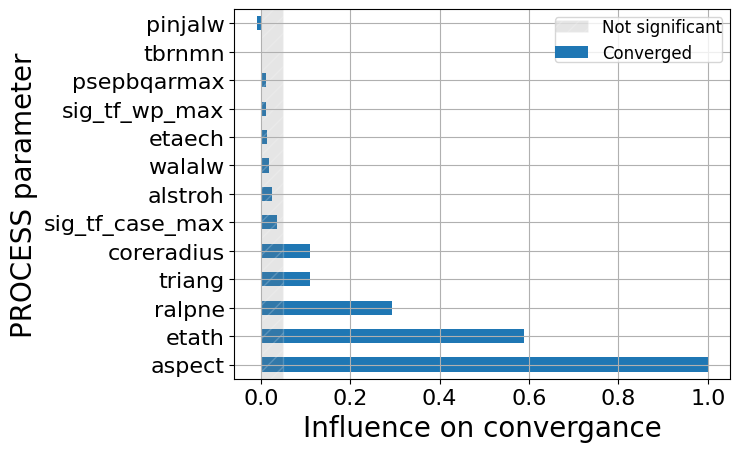

['aspect', 'etath', 'ralpne', 'triang', 'coreradius']


In [3]:
uq_data.convergence_regional_sensitivity_analysis(uq_data.input_names)
uq_data.plot_sumsq_sensitivity()
significant_conv_vars = uq_data.find_significant_parameters(uq_data.sumsq_sensitivity_df,"unconverged",0.05).tolist()
significant_conv_vars=significant_conv_vars
print(significant_conv_vars)


## Find the iteration variables which are influential for the significant convergence variables

In [4]:
copula = Copula(uq_data.converged_df,significant_conv_vars,copula_type="unbounded")
copula.calculate_copula(synthetic_sample_size=3000)
copula.calculate_pdf()
copula.copula_data_dict()
pdf_df=copula.create_pdf_df()
copula.find_max_pdf(print_data=False)
copula_correlation_matrix = copula.correlation_matrix()

/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:5999: RuntimeWarning: divide by zero encountered in divide
  return c**2 / (c**2 - n**2)
/home/graeme/process_uq/uqenv/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:719: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


## Create a copula based on the important variables for convergence and iteration variables

In [5]:
custom_data = {"aspect":3.0,"etath":0.375}
conv_copula_analysis=CopulaAnalysis(uq_data,copula,num_intervals=8)#,custom_data_point=custom_data)
show(conv_copula_analysis.create_graph_grid(significant_conv_vars))
conv_copula_analysis.plot_network(conv_copula_analysis.correlation_network(copula.correlation_matrix(),threshold=0.5,variables=significant_conv_vars),copula_correlation_matrix,)

[2.2402     2.39994286 2.55968571 2.71942857 2.87917143 3.03891429
 3.19865714 3.3584    ]
[0.29924756 0.32078077 0.34231397 0.36384718 0.38538038 0.40691359
 0.42844679 0.44998   ]
[0.0553463 0.061423  0.0674997 0.0735764 0.0796531 0.0857298 0.0918065
 0.0978832]
[0.40002    0.42857571 0.45713143 0.48568714 0.51424286 0.54279857
 0.57135429 0.59991   ]
[0.60003    0.64281857 0.68560714 0.72839571 0.77118429 0.81397286
 0.85676143 0.89955   ]


In [6]:
show(conv_copula_analysis.create_datatable(significant_conv_vars))


In [7]:
# all_variables = significant_conv_vars + ["sig_tf_case_max","sig_tf_wp_max","alstroh","rmajor",'bt', 'beta', 'jwptf', 'fcutfsu', 'plhthresh', 'wallmw', 'dene', 'ohcth', 'bore', 'coheof', 'powfmw', 'cohbop', 'te', 'bigq', 'tfcth', 'tdmptf', 'vtfskv']
# vars_to_model = []
# for item in all_variables:
#     if item not in vars_to_model:
#         vars_to_model.append(item)
# print(vars_to_model)
# itv_copula = Copula(uq_data.converged_df,vars_to_model, copula_type="unbounded")
# itv_copula.calculate_copula(synthetic_sample_size=5000)
# itv_copula.calculate_pdf()
# itv_pdf_df=itv_copula.create_pdf_df()
# itv_copula.copula_data_dict()


In [8]:
# custom_data = {"aspect":2.83,"etath":0.41}
# itv_conv_copula_analysis=CopulaAnalysis(uq_data,itv_copula,num_intervals=15,custom_data_point=custom_data)
# itv_correlation_matrix = itv_copula.correlation_matrix()
# show(itv_conv_copula_analysis.create_datatable(vars_to_model))
# itv_conv_copula_analysis.plot_network(itv_conv_copula_analysis.correlation_network(itv_copula.correlation_matrix(),threshold=0.5,variables=significant_conv_vars),itv_correlation_matrix,)